In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import os
os.chdir("E:\Analyticsvidya\HR analytics")

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train.head(15)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
train[train.isnull().any(axis=1)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
62,9150,Analytics,region_22,Bachelor's,f,other,1,28,NaN,1,1,0,80,0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1


In [47]:
train.describe(include='all')

C:\Users\saura\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,NaN,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,NaN,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,NaN,7.000000,1.000000,0.000000,76.000000,0.000000


In [4]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
train.education.fillna(train.education.mode()[0],inplace=True)

In [5]:
print(train.previous_year_rating.mean())

3.329255780917055


In [6]:
train.previous_year_rating.fillna(train.previous_year_rating.median(),inplace=True)

In [7]:
test.education.fillna(test.education.mode()[0],inplace=True)
test.previous_year_rating.fillna(test.previous_year_rating.median(),inplace=True)

In [8]:
4668/(4668+50140)

0.08517004816815063

In [8]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [9]:
dummies=pd.get_dummies(columns=['department','education','gender','recruitment_channel'],data=train)

In [10]:
train1=dummies.drop(['employee_id','region','department_Technology','education_Below Secondary','gender_f','recruitment_channel_referred'],axis=1)

In [32]:
test1=test.copy()
dummies1=pd.get_dummies(columns=['department','education','gender','recruitment_channel'],data=test)
test=dummies1.drop(['employee_id','region','department_Technology','education_Below Secondary','gender_f','recruitment_channel_referred'],axis=1)

KeyError: "None of [Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')] are in the [columns]"

In [30]:
test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'education_Bachelor's', 'education_Master's & above', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_sourcing'],
      dtype='object')

In [34]:
train1.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'education_Bachelor's', 'education_Master's & above', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_sourcing'],
      dtype='object')

In [93]:
train1.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,education_Bachelor's,education_Master's & above,gender_m,recruitment_channel_other,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,30,5.0,4,0,0,60,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,34,3.0,7,0,0,50,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,2,39,1.0,10,0,0,50,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,1,45,3.0,2,0,0,73,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [35]:
print(X.shape)
print(y.shape)

(54808, 13)
(54808,)


In [12]:
X=train1.drop('is_promoted',axis=1).values
y=train1['is_promoted'].values

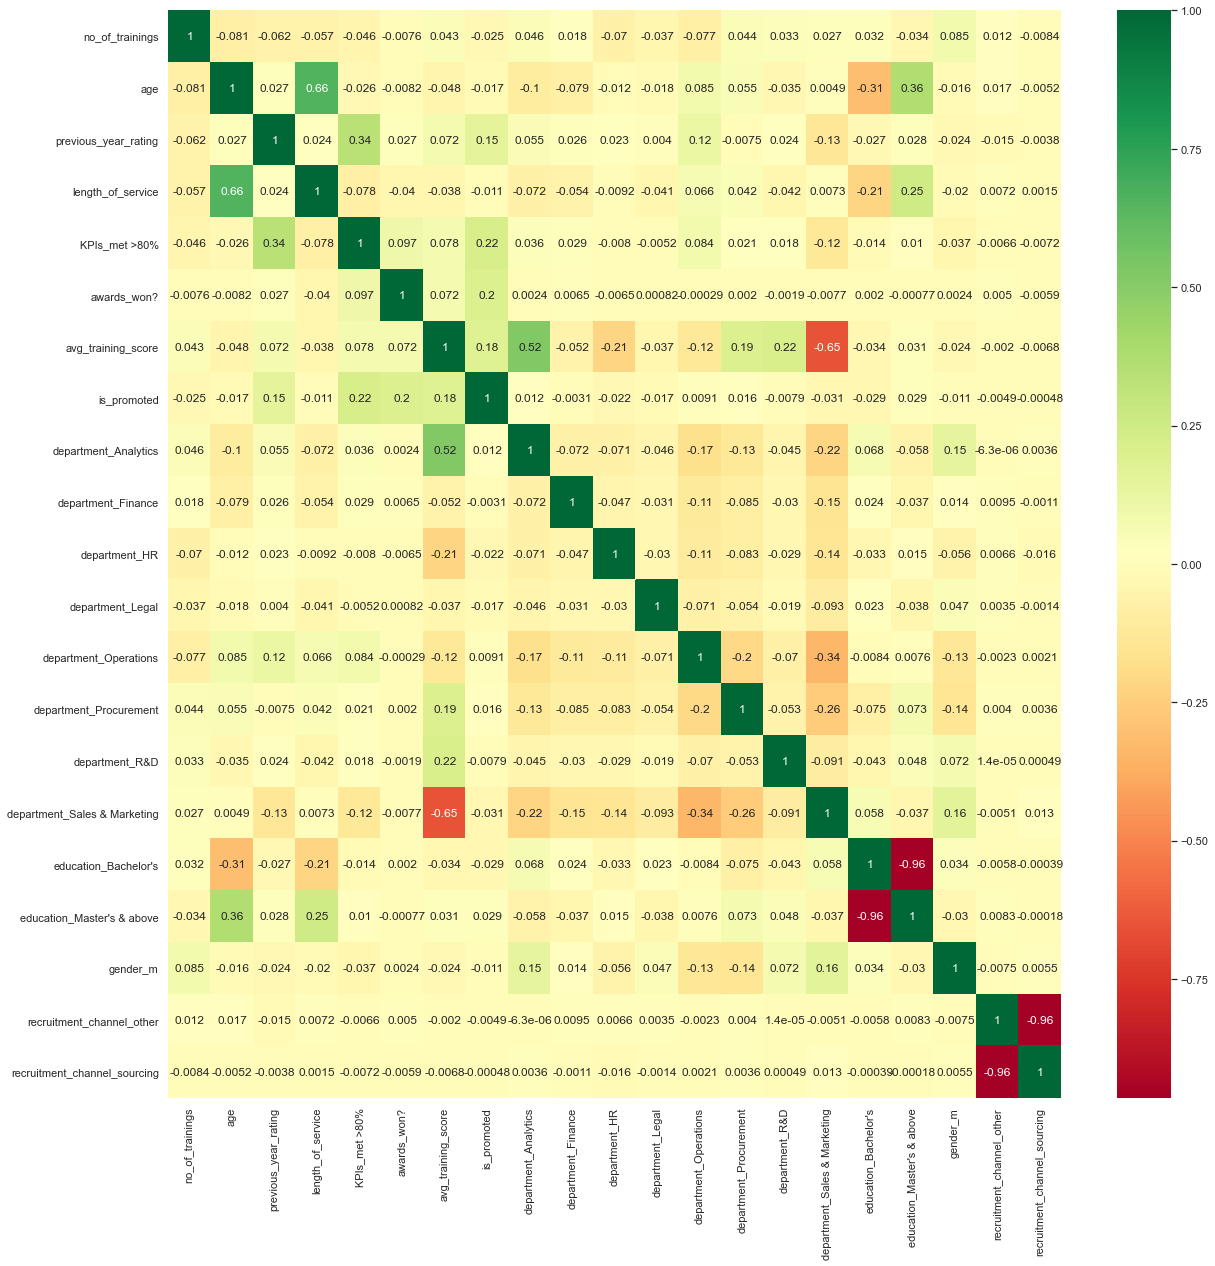

In [36]:
corrmat = train1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [118]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\saura\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
predict=model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))

[[12397   174]
 [  775   356]]
0.9307400379506642
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12571
           1       0.67      0.31      0.43      1131

   micro avg       0.93      0.93      0.93     13702
   macro avg       0.81      0.65      0.70     13702
weighted avg       0.92      0.93      0.92     13702



In [124]:
y_pred=model.predict(test)

In [16]:
dummies1=pd.get_dummies(columns=['department','education','gender','recruitment_channel'],data=test)
test=dummies1.drop(['employee_id','region','department_Technology','education_Below Secondary','gender_f','recruitment_channel_referred'],axis=1)

In [125]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
test1=pd.read_csv('test.csv')

In [129]:
output=pd.DataFrame(y_pred)

In [131]:
output['employee_id']=test1.employee_id

In [132]:
output

,0,employee_id
0,0,8724
1,0,74430
2,0,72255
3,0,38562
4,0,64486
5,0,46232
6,0,54542
7,0,67269
8,0,66174
9,0,76303


In [133]:
output.rename(columns={0:'is_promoted'},inplace=True)

In [134]:
output.to_csv('solution1.csv')

In [138]:
[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110,11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'criterion': ['entropy', 'gini'], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=42,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.6min
C:\Users\saura\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 44.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'criterion': ['entropy', 'gini'], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [27]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1800}

In [28]:
prediction=rf_randomcv.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[12546    25]
 [  763   368]]
0.9424901474237337
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12571
           1       0.94      0.33      0.48      1131

   micro avg       0.94      0.94      0.94     13702
   macro avg       0.94      0.66      0.73     13702
weighted avg       0.94      0.94      0.93     13702



In [25]:
y_pred=rf_randomcv.predict(test)
test1=pd.read_csv('test.csv')
output=pd.DataFrame(y_pred)
output['employee_id']=test1.employee_id
output.rename(columns={0:'is_promoted'},inplace=True)
output.to_csv('solution2.csv')

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'n_estimators': [1600, 1700, 1800, 1900, 2000], 'max_depth': [40], 'max_features': ['auto'], 'min_samples_split': [8, 9, 10, 11, 12], 'min_samples_leaf': [1, 3, 5]}


In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gf=GradientBoostingClassifier()

In [21]:
gf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [22]:
prediction=gf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[12564     7]
 [  776   355]]
0.9428550576558167
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12571
           1       0.98      0.31      0.48      1131

   micro avg       0.94      0.94      0.94     13702
   macro avg       0.96      0.66      0.72     13702
weighted avg       0.95      0.94      0.93     13702



In [26]:
param = {
    "n_estimators":[5,50,250,500],
    "max_depth":[3,5,7,9,12],
    "learning_rate":[0.01,0.1,0.15,0.2,0.25,0.3],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand=RandomizedSearchCV(gf,param_distributions=param,n_iter=100,cv=3,verbose=2,
                               random_state=42,n_jobs=-1)
rand.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 589.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 792.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [5, 50, 250, 500], 'criterion': ['friedman_mse', 'mae'], 'learning_rate': [0.01, 0.1, 1, 10, 100], 'max_features': ['log2', 'sqrt'], 'max_depth': [1, 3, 5, 7, 9], 'min_samples_split': array([0.1    , 0.13636, 0.17273, 0.20909, 0.24545, 0.28182, 0.31818,
       0.35455, 0.39091, 0.42727, 0.46364, 0.5    ]), 'min_samples_leaf': array([0.1    , 0.13636, 0.17273, 0.20909, 0.24545, 0.28182, 0.31818,
       0.35455, 0.39

In [28]:
rand.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.17272727272727273,
 'min_samples_split': 0.13636363636363638,
 'n_estimators': 250}

In [29]:
prediction=rand.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[12551    20]
 [  928   203]]
0.9308130199970808
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12571
           1       0.91      0.18      0.30      1131

   micro avg       0.93      0.93      0.93     13702
   macro avg       0.92      0.59      0.63     13702
weighted avg       0.93      0.93      0.91     13702



In [25]:
y_pred=rand.predict(test)
output=pd.DataFrame(y_pred)
output['employee_id']=test1.employee_id
output.rename(columns={0:'is_promoted'},inplace=True)
output.to_csv('solution4.csv')

In [34]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [14]:
import xgboost
classifier=xgboost.XGBClassifier()

In [15]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
prediction=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[12530    41]
 [  734   397]]
0.9434389140271493
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12571
           1       0.91      0.35      0.51      1131

    accuracy                           0.94     13702
   macro avg       0.93      0.67      0.74     13702
weighted avg       0.94      0.94      0.93     13702



In [35]:
y_pred=classifier.predict()
output=pd.DataFrame(y_pred)
output['employee_id']=test1.employee_id
output.rename(columns={0:'is_promoted'},inplace=True)
output.to_csv('solution4.csv')

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19'] ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department_Analytics', 'department_Finance', 'department_HR', 'department_Legal', 'department_Operations', 'department_Procurement', 'department_R&D', 'department_Sales & Marketing', "education_Bachelor's", "education_Master's & above", 'gender_m', 'recruitment_channel_other', 'recruitment_channel_sourcing']
expected f4, f13, f17, f15, f3, f7, f16, f9, f5, f19, f2, f1, f12, f10, f8, f11, f18, f6, f14, f0 in input data
training data did not have the following fields: previous_year_rating, department_Analytics, KPIs_met >80%, education_Bachelor's, department_Procurement, avg_training_score, department_Operations, recruitment_channel_other, recruitment_channel_sourcing, no_of_trainings, department_Finance, department_HR, education_Master's & above, age, length_of_service, awards_won?, gender_m, department_Legal, department_R&D, department_Sales & Marketing

In [ ]:
output['employee_id']=test1.employee_id

In [ ]:
output.rename(columns={0:'is_promoted'},inplace=True)

In [17]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [22]:
from sklearn.model_selection import RandomizedSearchCV


In [21]:
random_search.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [23]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [24]:
random_search.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                        

In [25]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   20.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   25.3s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [26]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [27]:
prediction=random_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[12557    14]
 [  785   346]]
0.9416873449131513
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12571
           1       0.96      0.31      0.46      1131

    accuracy                           0.94     13702
   macro avg       0.95      0.65      0.72     13702
weighted avg       0.94      0.94      0.93     13702

